In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/placement/placement.csv')

In [3]:
df.shape

(100, 3)

In [4]:
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


<Axes: xlabel='cgpa', ylabel='resume_score'>

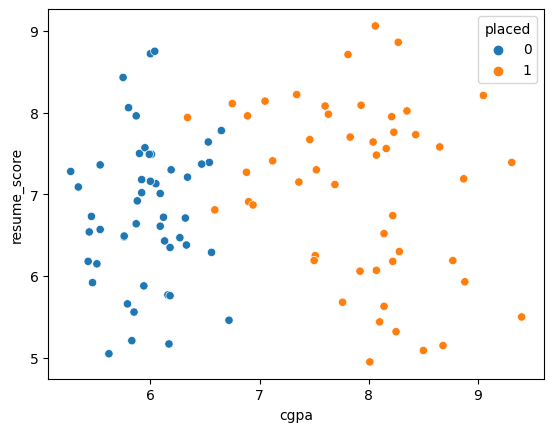

In [5]:
sns.scatterplot(data=df, x=df['cgpa'], y=df['resume_score'], hue=df['placed'])

In [6]:
X=df.iloc[:,0:2]
Y=df.iloc[:,-1]

In [7]:
from sklearn.linear_model import Perceptron
p = Perceptron()

In [8]:
p.fit(X,Y)

Perceptron()

In [9]:
p.coef_

array([[ 40.26, -36.  ]])

In [10]:
p.intercept_

array([-25.])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

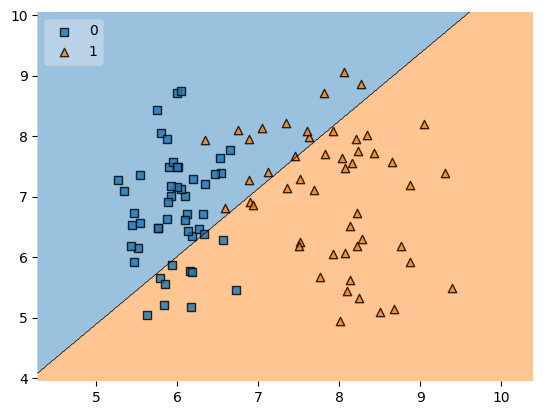

In [11]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values, Y.values, clf=p, legend=2)

**Perceptron Trick (Manual Application)**

In [12]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)
import matplotlib.pyplot as plt

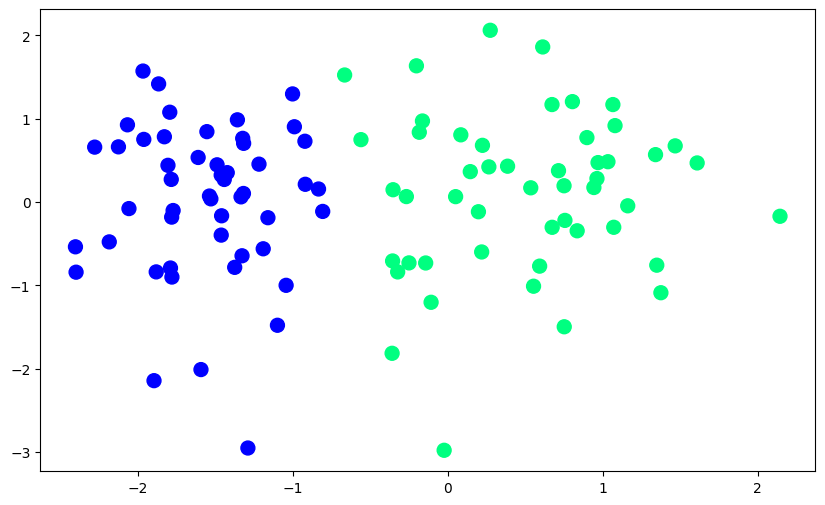

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [14]:
def step(z):
    return 1 if z>0 else 0

In [15]:
def perceptron(X,y):
    X=np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr=0.01
    
    for i in range(10000):
        j=np.random.randint(0,100)
        y_hat=step(np.dot(X[j],weights))
        weights=weights+lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [16]:
intercept_,coef_ = perceptron(X,y)

In [17]:
print(coef_)
print(intercept_)

[1.29941929 0.25617418]
0.94


In [18]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [19]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

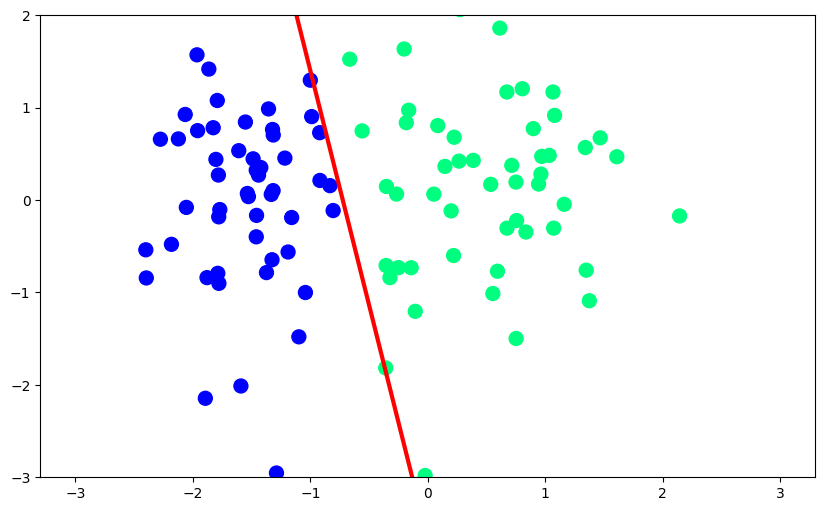

In [20]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)